# **Exercise**
Here we will try to train machine learning models to diagnose _Breast Cancer_. We will be using _Breast Cancer Wisconsin (Diagnostic)_ dataset provided by _UCI Machine Learning Repository_.

The details of the dataset can be found [here](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic). It consists of 30 real valued continous features and the diagnosis information (_Malignant_ or _Benign_) for 569 samples.

# **Uploading the data to colab**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
# Load the Breast Cancer dataset
data = pd.read_csv('wdbc.data', header=None)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Spilt the dataset to _train_, _validation_, and _test_ sets**



In [4]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, 2:]
output_classes = data.iloc[:, 1].unique().tolist()

y = pd.factorize(data.iloc[:,1])[0] # Convert the diagnosis column to numerical values

Take help from the previous notebook and spilt the data (**X, y**) into train, validation and test sets using ```train_test_split``` command.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(364, 30)
(364,)
(91, 30)
(91,)
(114, 30)
(114,)


# **Training different machine learning models**

Similar to previous notebook train the logistic regression model on the **training data**. In addition to logistic regression also try training another machine learning model **Decision Tree Classifier**. Don't worry about the details of this, you may use the default parameters.Feel free to try other machine learning models from ```sklearn``` [website](https://scikit-learn.org/stable/supervised_learning.html).

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

clf1 = LogisticRegression(random_state=42).fit(X_train,y_train)
clf2 = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Make predictions and evaluating the models**

## Logistic regression
Evaluate the performance of logistic regression on the validation set and print the _train_ and _validation_ accuracies.

In [8]:
y_pred_train1 = clf1.predict(X_train) # Predictions on training data
y_pred_val1 = clf1.predict(X_val) # Predictions on validation data

acc_train1 = (y_pred_train1 == y_train).sum() / len(y_train) # Training accuracy
acc_val1 = (y_pred_val1 == y_val).sum() / len(y_val)# Validation accuracy

print('Accuracy on Training set = {:.2f} %'.format(acc_train1 * 100))
print('\n')
print('Accuracy on Validation set = {:.2f} %'.format(acc_val1 * 100))

Accuracy on Training set = 95.88 %


Accuracy on Validation set = 95.60 %


## Decision tree
Evaluate the performance of decision tree classifier on the validation set and print the _train_ and _validation_ accuracies.

In [10]:
y_pred_train2 = clf2.predict(X_train) # Predictions on training data
y_pred_val2 = clf2.predict(X_val) # Predictions on validation data

acc_train2 = (y_pred_train2 == y_train).sum() / len(y_train) # Training accuracy
acc_val2 = (y_pred_val2 == y_val).sum() / len(y_val)# Validation accuracy

print('Accuracy on Training set = {:.2f} %'.format(acc_train2 * 100))
print('\n')
print('Accuracy on Validation set = {:.2f} %'.format(acc_val2 * 100))

Accuracy on Training set = 100.00 %


Accuracy on Validation set = 90.11 %


## Model selection and prediction on test set
Based on the results you have obtained choose the best performing model and evaluate its performance on the _test_ data. Also try to observe if a model is suffering from _overfitting_ or _underfitting_ problem.

In [12]:
# Make predictions on the test set
y_pred =  clf1.predict(X_test)#Predictions on test data

# Calculate and print the accuracy
acc_test = (y_pred == y_test).sum() / len(y_test)# Test accuracy


print('Accuracy on Test set = {:.2f} %'.format(acc_test * 100))

Accuracy on Test set = 95.61 %


# **Confusion Matrices**

Display the confusion matrices on **training**, **validation**, and **test** sets for the best performing model.

Feel free to try it for the other model as well.

## Training data

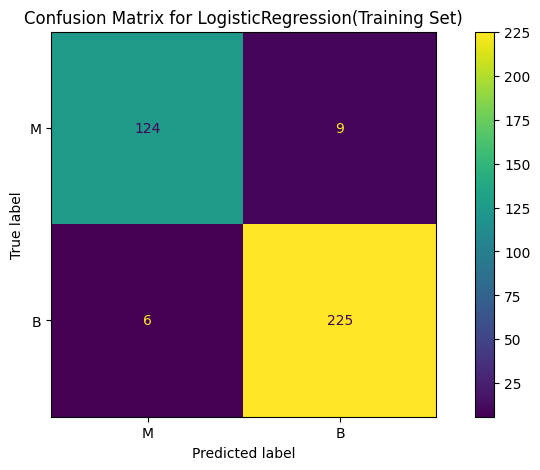

In [14]:
# Display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train1, ax=ax)
ax.xaxis.set_ticklabels(output_classes)
ax.yaxis.set_ticklabels(output_classes)
_ = ax.set_title(f"Confusion Matrix for {clf1.__class__.__name__}(Training Set)") # replace 'model' with clf1 or clf2

## Validation data

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(, , ax=ax)
ax.xaxis.set_ticklabels(output_classes)
ax.yaxis.set_ticklabels(output_classes)
_ = ax.set_title(f"Confusion Matrix for {model.__class__.__name__}(Validation Set)") # replace 'model' with clf1 or clf2

## Test data

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions( , , ax=ax)
ax.xaxis.set_ticklabels(output_classes)
ax.yaxis.set_ticklabels(output_classes)
_ = ax.set_title(f"Confusion Matrix for {model.__class__.__name__}(Test Set)") # replace 'model' with clf1 or clf2